# Feature Engineering

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# A. Handling Duplicated Data

In [23]:
df_titanic = pd.read_excel('titanic.xlsx')

In [24]:
#mengecek panjang baris dari df
len(df_titanic)

1349

In [25]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(df_titanic) - len(df_titanic.drop_duplicates())

44

Pada kode (len(df) - len(df.drop_duplicates())), Anda menghitung jumlah baris dengan duplikat dengan menghitung seluruh jumlah baris dalam DataFrame (len(df)) dan menguranginya dengan jumlah baris setelah menghapus duplikat menggunakan metode drop_duplicates. Ini menghitung semua duplikat di DataFrame.

In [26]:
#mengecek panjang baris ketika diperlakukan drop duplikat
len(df_titanic.drop_duplicates())

1305

In [27]:
len(df_titanic.drop_duplicates()) / len(df_titanic)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.9673832468495182

In [28]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = df_titanic[df_titanic.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA"
349,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA"
388,2,1,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S,14,NaN,"St Ives, Cornwall / Hancock, MI"
1048,3,0,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,NaN,255.0,NaN
1049,3,0,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1050,3,0,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN
1051,3,0,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN
1265,3,0,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,NaN,255.0,NaN
1266,3,0,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1267,3,0,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN


Pada kode (df[df.duplicated(keep=False)]), Anda langsung mencetak baris yang memiliki duplikat dengan menggunakan metode duplicated dan memasukkan parameter keep=False. Ini mencetak semua baris yang memiliki duplikat tanpa mengurangi apa pun dari DataFrame.

In [29]:
#Drop duplikat
df_titanic = df_titanic.drop_duplicates()

In [30]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(df_titanic) - len(df_titanic.drop_duplicates())

0

In [31]:
len(df_titanic.drop_duplicates()) / len(df_titanic)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

#### Telah dihandling drop duplikat

# B. Outlier Handling

Pemrosesan outlier adalah langkah-langkah untuk mengatasi data yang jauh berbeda dari data lainnya dalam suatu dataset. Outlier adalah data yang sangat aneh dibandingkan dengan data lainnya, hingga menimbulkan kecurigaan bahwa data tersebut berasal dari sumber yang berbeda. Hal ini dapat memengaruhi statistik seperti rata-rata dan varians, serta kinerja beberapa model Machine Learning. Oleh karena itu, tergantung pada algoritma yang digunakan, seringkali diperlukan tindakan untuk mengatasi outlier dengan menghapus atau memprosesnya.
Ada 2 cara yang umum dipakai untuk handling outlier :
1. IQR : Interquartile (Pendekatan Statistik)
2. Nilai Sembarang : (Pendekatan Bisnis)

### Outlier Handling : InterQuartile Handling

In [32]:
# untuk plot Q-Q
import scipy.stats as stats

In [33]:
df_california = pd.read_csv('california_dataset.csv')
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
from sklearn.model_selection import train_test_split
train_clfr, test_clfr = train_test_split(df_california, test_size = 0.2, random_state=42)
#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [35]:
df_california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [36]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

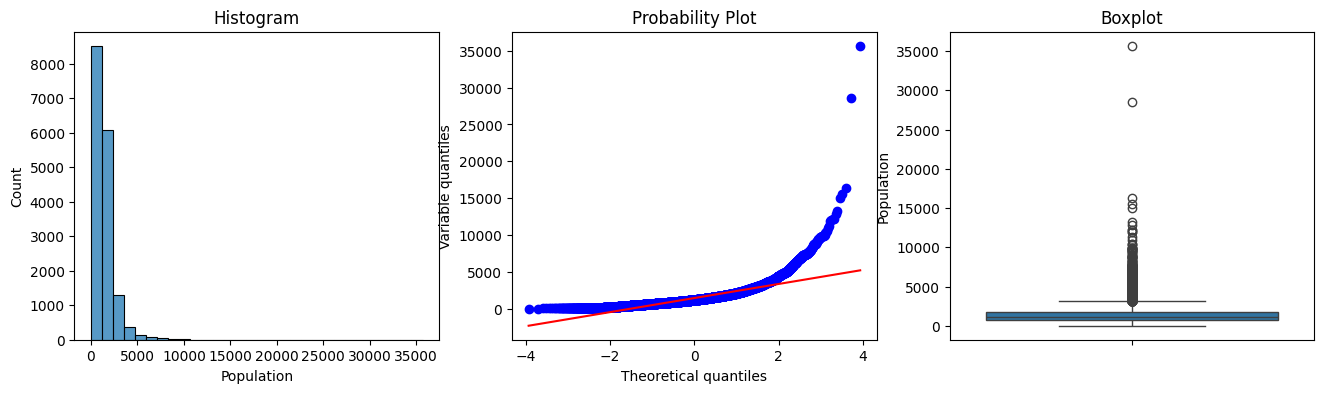

In [37]:
# memvisualisasikan outlier di LSTAT
check_plot(train_clfr, 'Population')

In [38]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [39]:
# batas untuk LSTAT

Population_upper_limit, Population_lower_limit = find_outlier_boundary(train_clfr, 'Population')
Population_upper_limit, Population_lower_limit

(3131.5, -616.5)

In [40]:
# Sekarang mari kita ganti outlier dengan batas maksimum dan minimum

train_clfr['Population']= np.where(train_clfr['Population'] > Population_upper_limit, Population_upper_limit,
                       np.where(train_clfr['Population'] < Population_lower_limit, Population_lower_limit, train_clfr['Population']))

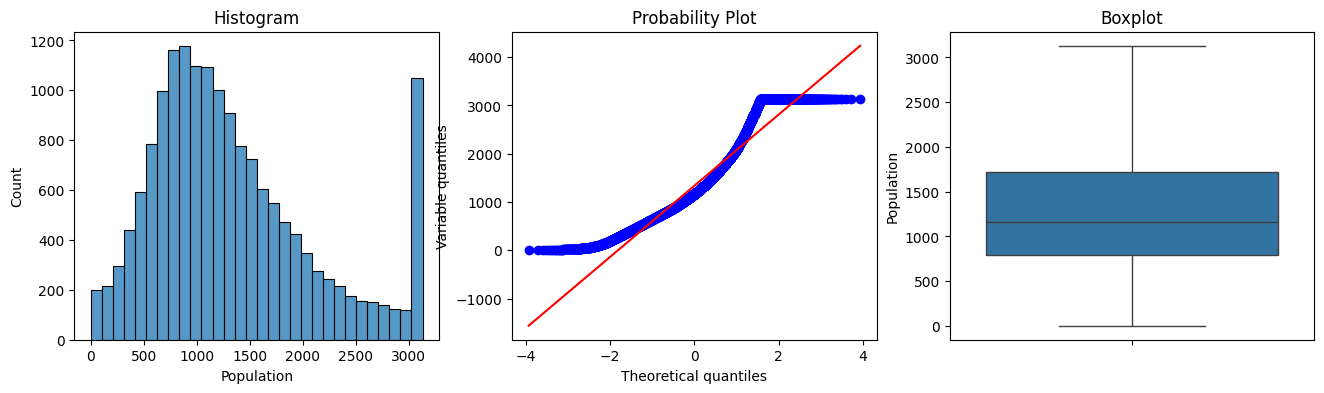

In [41]:
# memvisualisasikan outlier di LSTAT
check_plot(train_clfr, 'Population')

Dari distribusi diatas, tidak skew kanan yang extreme, melainkan ada 1 nilai di sebelah kanan yang menumpuk akibat handling IQR namun hal ini valid secara statistik. Boxplot pun hilang karena pengaruh IQR ini.

### 2. Outlier Handling : Nilai Sembarang (Business Perspective)

In [42]:
# Uncomment ini jika belum memiliki library feature engine
#!pip install feature_engine
#atau
#!pip install feature-engine
from feature_engine.outliers import ArbitraryOutlierCapper

In [43]:
#kita gunakan df_titanic diatas
from sklearn.model_selection import train_test_split
train_titanic, test_titanic = train_test_split(df_titanic, test_size = 0.2, random_state=42)
#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [44]:
train_titanic.age.describe()

count    835.000000
mean      29.932335
std       14.133864
min        0.166700
25%       21.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: age, dtype: float64

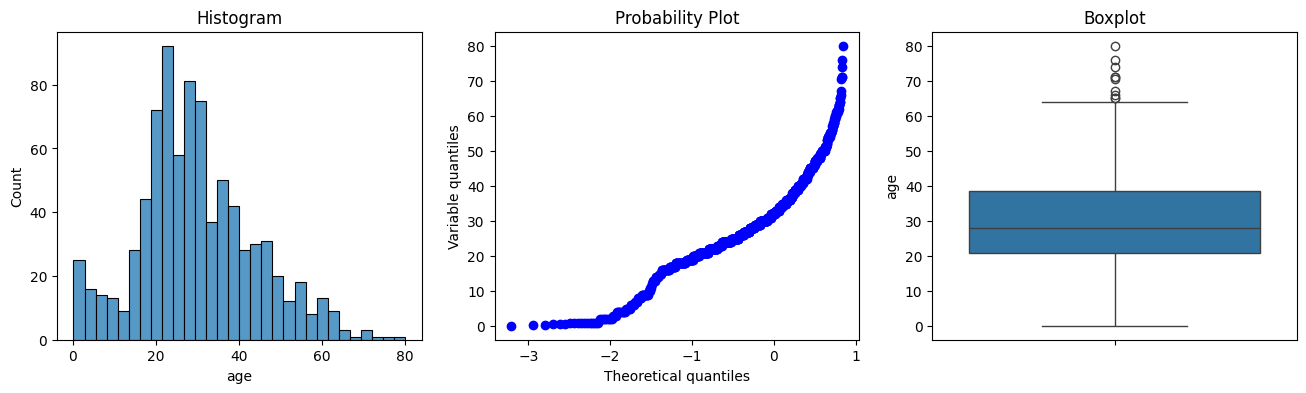

In [45]:
# memvisualisasikan outlier di LSTAT
check_plot(train_titanic, 'age')

Misal karena alasan keselamatan dan tanggung jawab bersama maka ada aturan di kapal titanic bahwa anak-anak dibawah 3 tahun dilarang naik kapal, minimal harus 3 tahun dan maksimal umur 80 tahun.

In [46]:
teknik_capper = ArbitraryOutlierCapper(max_capping_dict={'age': 80},
                                       min_capping_dict={'age': 3})

teknik_capper.fit(train_titanic.fillna(0))
#Dokumentasi : https://feature-engine.trainindata.com/en/1.1.x/outliers/ArbitraryOutlierCapper.html
#asumsikan sudah dilakukan handling missing value dengan teknik sementara yaitu memasukkan nilai 0,
#(nanti nilainya bisa disesuaikan menggunakan median misalnya karena numerikal, kategorikal bisa memakai modus)
#jika tidak demikian maka .fit akan error karena ada NaN atau nilai null lainnya

ArbitraryOutlierCapper(max_capping_dict={'age': 80},
                       min_capping_dict={'age': 3})

In [47]:
train_titanic = teknik_capper.transform(train_titanic.fillna(0))

In [48]:
train_titanic.age.describe()

count    1044.000000
mean       24.584291
std        16.553484
min         3.000000
25%         8.000000
50%        24.250000
75%        35.000000
max        80.000000
Name: age, dtype: float64

Dari describe diatas berlaku nilai minimalnya 3 tahun dan maksimalnya 80 tahun.

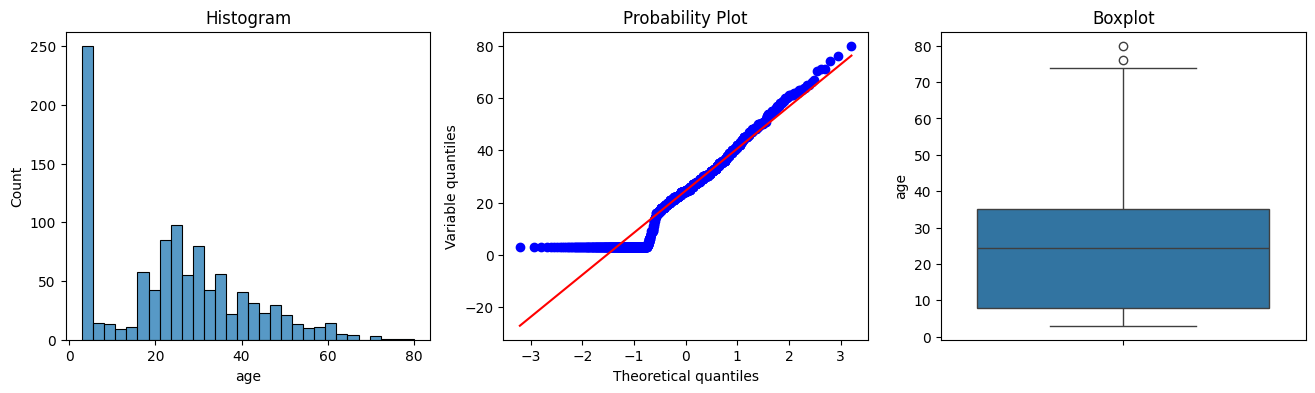

In [49]:
# memvisualisasikan outlier di LSTAT
check_plot(train_titanic, 'age')

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [50]:
df_company = pd.read_csv('company.csv')

In [51]:
df_company.isna().sum()

Revenue         0
Size            0
Rating          0
Headquarters    0
dtype: int64

Apakah benar tidak ada missing value ?

In [52]:
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


Revenue
Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64


============= Size =================


Size
51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: count, dtype: int64


============= Rating =================


Rating
 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: count, dtype: int64


============= Headquarters =================


Headquarters
New York, NY                 33
-1                           31
San Francisco, CA            31
Chicago, IL                  23
Boston, MA                   19
Reston, VA                   14
Mc Lean, VA                  13
Westminster, CO              12
Cambridge, United Kingdom    10
Cambridge, MA                10
Vienna, VA                    8
Denver, CO                    7
Herndon, VA                   7
Washington, DC                7
Woodbine, MD                  7
Saint Louis, MO               7
Bedford, MA                   7
Arlington, VA                 7
San Jose, CA                  7
San Antonio, TX               6
Mountain View, CA             6
Basel, Switzerland            6
San Rafael, CA                6
Chantilly, VA                 6
Fairfax, VA                   5
Houston, TX                   5
Pittsburgh, PA                5
Bethesda, MD                  5
Rockville, MD                 5
Los Angeles, CA               5
Springfield, MA            

Ternyata terdapat nilai missing value di ketiga kolom itu :
- Rating: -1
- Size: -1, Unknown
- Revenue: -1, Unknown / Non-Applicable

Lalu kita akan cek berapa masing-masing kolom memiliki persentase missing value, dalam statistik ketentuannya ialah jika diatas 20% maka kita drop kolomnya, jika <= 20% maka di handling karena alasan distribusi data.

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [53]:
100 * len(df_company[df_company['Rating']==-1]) / len(df_company)

7.440476190476191

In [54]:
100 * len(df_company[df_company['Size'].isin(['-1','Unknown'])]) / len(df_company)

6.5476190476190474

In [55]:
100 * len(df_company[df_company['Revenue'].isin(['-1','Unknown / Non-Applicable'])]) / len(df_company)

35.714285714285715

Kita akan drop kolonm Revenue karena diatas 20% nilai missing kolomnya.

In [56]:
df_company = df_company.drop(columns=['Revenue'])

In [57]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Size          672 non-null    object 
 1   Rating        672 non-null    float64
 2   Headquarters  672 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.9+ KB


In [58]:
from sklearn.model_selection import train_test_split
train_company, test_company = train_test_split(df_company, test_size = 0.2, random_state=42)
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

In [59]:
# Median imputation on Rating column : train

median_rating_train = train_company[train_company['Rating']!=-1]['Rating'].median()

In [60]:
median_rating_train

3.8

In [61]:
#implement missing value imputation to train and test, from rating median value in train data
train_company['Rating'] = train_company['Rating'].apply(lambda x: median_rating_train if x==-1 else x) #train
test_company['Rating'] = test_company['Rating'].apply(lambda x: median_rating_train if x==-1 else x) #test

In [62]:
#Mode imputation Untuk Size
train_mode_size = train_company[~train_company['Size'].isin(['-1','Unknown'])]['Size'].mode()[0]
train_mode_size

'51 to 200 employees'

In [63]:
#implement missing value imputation to train and test, from size mode value in train data
train_company['Size'] = train_company['Size'].apply(lambda x: train_mode_size if x in ['-1','Unknown'] else x)
test_company['Size'] = test_company['Size'].apply(lambda x: train_mode_size if x in ['-1','Unknown'] else x)

# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

Doing Label Encoder / Ordinal Encoding in categorical data, both in test and train has the same value such as Yes, No, No phone Service, No internet service. So we can change categorical into 1 and 0 based on configuration below :
Notes : we can do without splitting in Ordinal Encoding, but we can make sure that there are same value in train and test.

In [64]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')
# Mengganti "Yes" menjadi 1 dan "No" menjadi 0 dalam kolom "Churn"
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [65]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
#Cek nilai-nilai di kolom kategorikal
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

In [68]:
#Lakukan normalisasi nilai terlebih dahulu
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

In [69]:
#Cek nilai-nilai di kolom kategorikal
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No     4999
Yes    2044
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

## 1. One Hot Encoding (OHE)

In [70]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, random_state = 42)

In [71]:
# Melakukan one-hot encoding pada kolom "gender"
# Kolom-kolom yang ingin di one-hot encoding
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train_churn = pd.get_dummies(train_churn, columns=encode_ohe)
test_churn = pd.get_dummies(test_churn, columns=encode_ohe)

Jika ada nilai dalam kolom-kolom yang Anda one-hot encode dalam data pelatihan (train) yang tidak ada dalam data uji (test), maka Anda perlu memperlakukannya dengan hati-hati. Solusi yang umum adalah memastikan bahwa Anda juga mengekstrak kolom dummy yang sesuai di data uji untuk memastikan konsistensi dalam kolom tersebut. Seperti kolom gender, pasti memiliki 2 nilai saja yaitu Male and Female saja.

In [72]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0,False,True


In [73]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,1,True,False
2715,0484-JPBRU,0,No,No,41,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0,False,True
3825,3620-EHIMZ,0,Yes,Yes,52,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,0,True,False
1807,6910-HADCM,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,1,True,False
132,8587-XYZSF,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,0,False,True


## 2. Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['Partner', 'Dependents']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [75]:
# Menerapkan label encoding ke data pelatihan (train)
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [76]:
# Menerapkan label encoding yang sama ke data uji (test)
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [77]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,0,0,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,1,0,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,0,0,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,0,1,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0,False,True


In [78]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,1,0,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,1,True,False
2715,0484-JPBRU,0,0,0,41,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0,False,True
3825,3620-EHIMZ,0,1,1,52,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,0,True,False
1807,6910-HADCM,0,0,0,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,1,True,False
132,8587-XYZSF,0,0,0,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,0,False,True


# 3. Mean Encoding

In [79]:
# kita lakukan hal yang sama dengan menaruh informasi perhitungannya dalam dictionary
# kita ambil nilainya dari data train saja
# kemudian kita aplikasikan ke kolom cabin pada data train dan juga ke data test menggunakan dict_contract
dict_contract = train_churn.groupby(['Contract'])['Churn'].mean().to_dict()
dict_contract

{'Month-to-month': 0.4265325981187155,
 'One year': 0.11798679867986799,
 'Two year': 0.028379387602688575}

Artinya dari hasil dictionary diatas :
1. Month-to-month memiliki rata-rata tingkat Churn sekitar **42.65%**, yang berarti sekitar 42.65% dari Customer dengan kategori Churn.
2. One year memiliki rata-rata tingkat Churn sekitar **11.79%**, yang berarti sekitar 11.79% dari Customer dengan kategori Churn.
3. Two Year memiliki rata-rata tingkat Churn sekitar **2.83%**, yang berarti sekitar 2.83% dari Customer dengan kategori  Churn.

In [80]:
# kita ubah nilai kategorikal di data train dan test pada kolom Contract menggunakan nilai dari dict_contract
# untuk mencegah data leakage
train_churn['Contract'] = train_churn['Contract'].map(dict_contract)
test_churn['Contract'] = test_churn['Contract'].map(dict_contract)

In [81]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,0.117987,No,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,0,0,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,0.028379,Yes,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,1,0,1,No,No,DSL,No,No,No,No,No,No,0.426533,Yes,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,0,0,4,Yes,No,Fiber optic,No,No,No,No,No,No,0.426533,Yes,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,0,1,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,0.028379,Yes,Bank transfer (automatic),61.90,,0,False,True


In [82]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,1,0,1,No,No,DSL,No,No,No,No,No,No,0.426533,Yes,Electronic check,24.80,24.8,1,True,False
2715,0484-JPBRU,0,0,0,41,Yes,Yes,No,No,No,No,No,No,No,0.426533,Yes,Bank transfer (automatic),25.25,996.45,0,False,True
3825,3620-EHIMZ,0,1,1,52,Yes,No,No,No,No,No,No,No,No,0.028379,No,Mailed check,19.35,1031.7,0,True,False
1807,6910-HADCM,0,0,0,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,0.426533,No,Electronic check,76.35,76.35,1,True,False
132,8587-XYZSF,0,0,0,67,Yes,No,DSL,No,No,No,Yes,No,No,0.028379,No,Bank transfer (automatic),50.55,3260.1,0,False,True


## E. Feature Scalling
Proses perubahan nilai skala dengan pendekatan statistik, dengan mengubah nilai tapi tidak mengubah makna. Tekniknya :
1. StandarScaller
2. MinMaxScaller
### Notes :
Pada pembahasan kali ini, akan dilakukan pada kolom yang sama bertujuan untuk melakukan cara penggunaan libraries nya saja. Pada kolom : ['tenure', 'MonthlyCharges']

### 1.  StandarScaller

In [83]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['tenure', 'MonthlyCharges']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [84]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int32  
 3   Dependents        5634 non-null   int32  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   float64
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 
 17

In [85]:
# Menerapkan standarisasi ke data pelatihan (train)
train_churn[['tenure_stds', 'MonthlyCharges_stds']] = scaler.fit_transform(train_churn[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test_churn[['tenure_stds', 'MonthlyCharges_stds']] = scaler.transform(test_churn[columns_to_stdscaller])

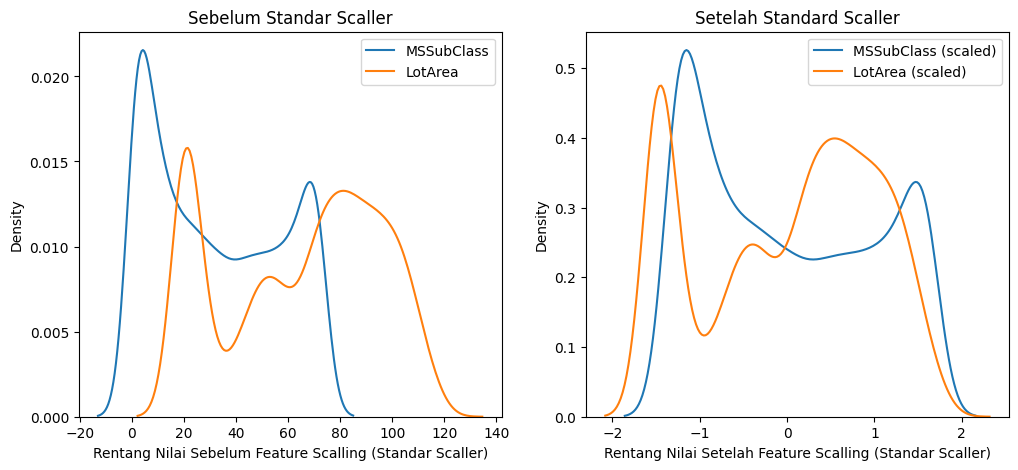

In [86]:
# kita lihat distribusi dari variabel sebelum standar scaller dan setelah standar scaller

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(train_churn['tenure'], ax=ax1, label='MSSubClass')
sns.kdeplot(train_churn['MonthlyCharges'], ax=ax1, label='LotArea')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(train_churn['tenure_stds'], ax=ax2, label='MSSubClass (scaled)')
sns.kdeplot(train_churn['MonthlyCharges_stds'], ax=ax2, label='LotArea (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

### 2. MinMaxScaller

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Kolom-kolom yang ingin dinormalisasi
columns_to_normalize = ['tenure', 'MonthlyCharges']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [88]:
# Menerapkan normalisasi Min-Max ke data pelatihan (train)
train_churn[['tenure_minmax', 'MonthlyCharges_minmax']] = minmax.fit_transform(train_churn[columns_to_normalize])

# Menerapkan normalisasi Min-Max yang sama ke data uji (test)
test_churn[['tenure_minmax', 'MonthlyCharges_minmax']] = minmax.transform(test_churn[columns_to_normalize])

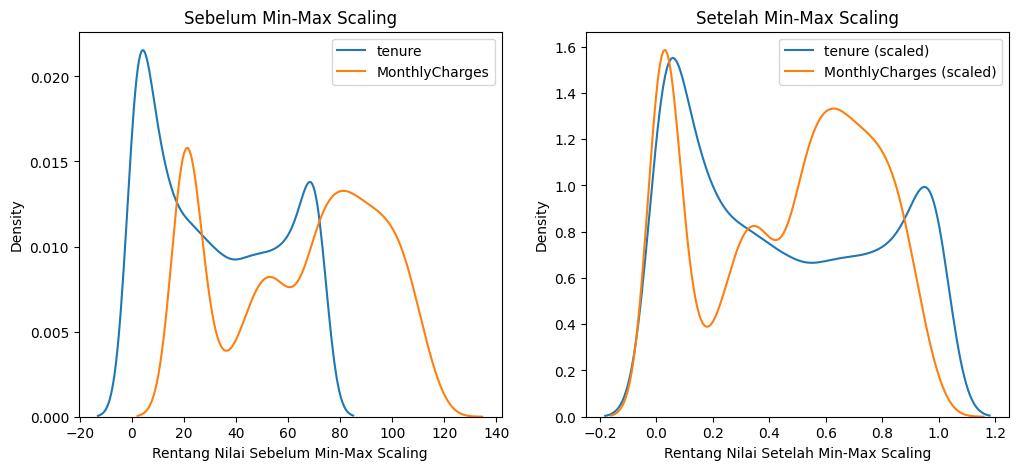

In [89]:
# Plot distribusi sebelum dan sesudah Min-Max Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(train_churn['tenure'], ax=ax1, label='tenure')
sns.kdeplot(train_churn['MonthlyCharges'], ax=ax1, label='MonthlyCharges')

# Plot distribusi setelah Min-Max Scaling
ax2.set_title('Setelah Min-Max Scaling')
sns.kdeplot(train_churn['tenure_minmax'], ax=ax2, label='tenure (scaled)')
sns.kdeplot(train_churn['MonthlyCharges_minmax'], ax=ax2, label='MonthlyCharges (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [90]:
# Bisa juga melihat dengan pendekatan statistika
# Karena MinMaxScaller -> nilai min = 0, nilai max = 1
train_churn[['tenure_minmax','MonthlyCharges_minmax']].describe()

,tenure_minmax,MonthlyCharges_minmax
count,5634.000000,5634.000000
mean,0.449626,0.464517
std,0.339230,0.299844
min,0.000000,0.000000
25%,0.125000,0.174390
50%,0.402778,0.520927
75%,0.763889,0.714375
max,1.000000,1.000000


## Thank you :)